# Project: Mobile apps analysis

## Description

- This project is a small project to analyze and find the insights from a dataset which gathers different apps usage from end-users and their ratings. 
- Analyzing this dataset might help the team know which apps/ app categories attract the users the most.

## Dataset

- There are currently more than 4 million apps in App Store and Google Play (in 2018). Thus, this is just a sample of the data.
- Data source: 
    - [Kaggle - Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps/home)
    - [Kaggle - Mobile App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home)
- Note that these 2 datasets are not aligned.

## Project folder

In [1]:
!ls

AppleStore.csv	Basic.ipynb  Basics.ipynb  googleplaystore.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
app_store = "./AppleStore.csv"
google_play_store = "./googleplaystore.csv"

In [4]:
from csv import reader
def explore_data(file_name, header=True):
    with open(file_name, "r", encoding="utf8") as f:
        data = reader(f)
        data = list(data)
        print("Sample data:")
        if header:
            for i in range(len(data[0])):
                print("{}: {}".format(data[0][i], data[1][i]))
        else:
            print(data[1:5])
        print("\n")
        print("Number of columns: ", len(data[0]))
        print("Number of rows: ", len(data[1:]))
        return data

In [5]:
app_store_data = explore_data(app_store)
print("Unique apps: {}".format(len(np.unique([row[2] for row in app_store_data[1:]]))))

Sample data:
: 1
id: 281656475
track_name: PAC-MAN Premium
size_bytes: 100788224
currency: USD
price: 3.99
rating_count_tot: 21292
rating_count_ver: 26
user_rating: 4
user_rating_ver: 4.5
ver: 6.3.5
cont_rating: 4+
prime_genre: Games
sup_devices.num: 38
ipadSc_urls.num: 5
lang.num: 10
vpp_lic: 1


Number of columns:  17
Number of rows:  7197
Unique apps: 7195


We see that the app store dataset has a total of 17 columns, and 7198 rows; each row represents one iOS app with their properties, i.e. the size, price, rating, etc.

In [6]:
google_play_data = explore_data(google_play_store)
print("Unique apps: {}".format(len(np.unique([row[0] for row in google_play_data[1:]]))))

Sample data:
App: Photo Editor & Candy Camera & Grid & ScrapBook
Category: ART_AND_DESIGN
Rating: 4.1
Reviews: 159
Size: 19M
Installs: 10,000+
Type: Free
Price: 0
Content Rating: Everyone
Genres: Art & Design
Last Updated: January 7, 2018
Current Ver: 1.0.0
Android Ver: 4.0.3 and up


Number of columns:  13
Number of rows:  10841
Unique apps: 9660


## Scenarios:

Assume that we need to build an English app which is free for users to download and use. Our revenue will come from the in-app ads. Thus, we need to attract a lot of users. The more users use the app, the more ads they engage with.

Therefore, what we are interested in are: 

- Price:
    - iOS: "price"
    - Google Play: "Price"/ "Type" 
- The genre:
    - iOS: "prime_genre"
    - Google Play: "Genres"
- Number of reviews:
    - iOS: "rating_count_tot"
    - Google Play: "Reviews"
- Rating:
    - iOS: "user_rating"
    - Google Play: "Rating"

## Data Cleaning

These datasets are scraped from the Internet. Therefore, due to several factors, it might include some errors in the dataset. Cleaning data before analyzing is always important to make sure the data we analyze is accurate.

### Cleaning Duplicates:

Each row in a dataset should represent for 1 unique application in the store. However, as you can see in the data exploration part above:
- iOS: there are 7197 rows but only 7195 unique apps => There must be at least 1 app (with 2 duplicates) or 2 apps (each has one duplicate) in the dataset
- Google Store: there are 9660 unique, but 10841 rows in the dataset. This means there must be 1181 rows are duplicates of the others. 

There are several techniques to deal with duplicates, but for simplicity, we can just remove them for now.

In [7]:
def remove_duplicates(apps_data, column_index, header=True, sort_duplicates_callback=None, method="first"):
    """
    This function helps to remove the duplicates from the data. 
    The column which will be used to checked for duplicates is specified by the column_index
    
    Params:
        apps_data (list): The dataset
        column_index (int): Index of the column to check for duplicates
        header (bool): default = True, if the dataset has the header or not. 
        sort_duplicates_callback (callback): a function which is used to sort the duplicates.
        method (str): default = "first", current support: "first" or "last". Take the first or the last row for each duplicates
    """
    # First, we sort the dataset using column_index
    if header:
        header = apps_data[0]
        apps_data = apps_data[1:]
    apps_data = sorted(apps_data, key= lambda row: row[column_index])
    filtered_apps_data = []
    current_check = None
    temp_duplicates_list = []
    
    def append_to_list():
        if method == "first":
            filtered_apps_data.append(temp_duplicates_list[0])
        elif method == "last":
            filtered_apps_data.append(temp_duplicates_list[-1])
        else:
            raise NotImplementedError("Method \"{}\" is not supported".format(method))
        
    for index, row in enumerate(apps_data):
        if index == 0:
            current_check = row[column_index]
            temp_duplicates_list.append(row)
            continue
        if row[column_index] == current_check:
            temp_duplicates_list.append(row)
        else:
            if sort_duplicates_callback is not None:
                temp_duplicates_list = sorted(temp_duplicates_list, key=sort_duplicates_callback)
            append_to_list()
            temp_duplicates_list = [row]
            current_check = row[column_index]
        if index == len(apps_data) - 1:
            append_to_list()
            break
    if header:
        filtered_apps_data.insert(0, header)
    return filtered_apps_data

There are different criterias we can use to so

In [8]:
google_play_data_no_duplicates = remove_duplicates(google_play_data, 0, 
                                              sort_duplicates_callback=lambda row: row[3], method="last")

In [9]:
print("Unique Google Play Store apps: {}".format(len(np.unique([row[0] for row in google_play_data_no_duplicates[1:]]))))

Unique Google Play Store apps: 9660


In [10]:
app_store_data_no_duplicates = remove_duplicates(app_store_data, 2)

In [11]:
print("Unique App Store apps: {}".format(len(np.unique([row[0] for row in app_store_data_no_duplicates[1:]]))))

Unique App Store apps: 7195


You see that after removes the duplicates, we have exactly the same number of unique apps we explored above.

In [12]:
def is_english(string, no_allowed_non_latin=3):
    no_non_latin = 0
    for c in string:
        if ord(c) > 127:
            no_non_latin +=1
        if no_non_latin > no_allowed_non_latin:
            return False
    return True

def get_price(price):
    new_price = ""
    for c in price:
        if c.isdigit() or c in [".", ","]:
            new_price += c
    return float(new_price)

In [13]:
def remove_non_english_and_paid(apps_data, name_column_index,
                               price_column_index, header=True):
    new_apps_data = []
    if header:
        data = apps_data[1:]
        new_apps_data.append(apps_data[0])
    else:
        data = apps_data[:]
    for row in data:
        try:
            if is_english(row[name_column_index]) and get_price(row[price_column_index]) == 0:
                new_apps_data.append(row)
        except ValueError:
            # Price format is not correct
            continue
    return new_apps_data
        

In [14]:
free_english_android_apps = remove_non_english_and_paid(google_play_data_no_duplicates, 0, 7)
free_english_ios_apps = remove_non_english_and_paid(app_store_data_no_duplicates, 2, 5)

## Analysis

So we have finished some basic steps to clean the data and remove unnecessary entries for our analysis purposes. Now we have two datasets which include only the apps which are free and English language (not really English in our case, it should be called a Latin language).

It now comes to the next step: analysis. Before doing the analysis, we have to first ask the questions why we want to analyze the data, what we want to get from the data or what we want to report to the customers?

> Always ask questions

### Questions:

- What are the most common genres for Google Play/ App Store?
- What are the most common genres which attract more users in both market?
- What are the genres which have high average ratings?

One thing we should remember is we do analysis to serve some purposes, and those purposes must be in form of questions. Let's do the analysis to answer the questions above.

#### Most common genres

To know what is the most common genres, we need first to calculate the frequency of each genres which are in the market

In [15]:
def frequency_calc(apps_data, column_index, header=True,
                  return_tuple=True):
    if header:
        data = apps_data[1:]
    else:
        data = apps_data
    freq_table = {}
    for row in data:
        val = row[column_index]
        if val in freq_table:
            freq_table[val] += 1
        else:
            freq_table[val] = 1
    freq_table_percentage = {k: (v / len(data) * 100) for k, v in freq_table.items()}
    if return_tuple:
        return list(zip(freq_table_percentage.keys(), freq_table_percentage.values()))
    return freq_table_percentage

In [16]:
android_apps_genre_freq_tuple = frequency_calc(free_english_android_apps, 1)
ios_apps_genre_freq_tuple = frequency_calc(free_english_ios_apps, -5)

In [17]:
def sort_freq(freq_tuple):
    return sorted(freq_tuple, key=lambda x: x[1], reverse=True)

In [18]:
android_apps_genre_freq_tuple = sort_freq(android_apps_genre_freq_tuple)
ios_apps_genre_freq_tuple = sort_freq(ios_apps_genre_freq_tuple)

In [19]:
for genre, percentage in android_apps_genre_freq_tuple:
    print("{}: {}".format(genre, percentage))

FAMILY: 18.968630106070865
GAME: 9.68178740690589
TOOLS: 8.451816745655607
BUSINESS: 4.5926427443015125
LIFESTYLE: 3.9043105393816293
PRODUCTIVITY: 3.8930264048747465
FINANCE: 3.7011961182577298
MEDICAL: 3.5206499661475967
SPORTS: 3.39652448657188
PERSONALIZATION: 3.3175355450236967
COMMUNICATION: 3.238546603475513
HEALTH_AND_FITNESS: 3.080568720379147
PHOTOGRAPHY: 2.945159106296547
NEWS_AND_MAGAZINES: 2.798465357707064
SOCIAL: 2.663055743624464
TRAVEL_AND_LOCAL: 2.335815842924848
SHOPPING: 2.2455427668697814
BOOKS_AND_REFERENCE: 2.143985556307831
DATING: 1.8618821936357481
VIDEO_PLAYERS: 1.7941773865944481
MAPS_AND_NAVIGATION: 1.399232678853532
FOOD_AND_DRINK: 1.2412547957571656
EDUCATION: 1.162265854208982
ENTERTAINMENT: 0.9478672985781991
LIBRARIES_AND_DEMO: 0.9365831640713158
AUTO_AND_VEHICLES: 0.9252990295644324
HOUSE_AND_HOME: 0.8237418190024826
WEATHER: 0.8011735499887158
EVENTS: 0.7109004739336493
PARENTING: 0.6544798013992327
ART_AND_DESIGN: 0.6431956668923494
COMICS: 0.620627

In [20]:
for genre, percentage in ios_apps_genre_freq_tuple:
    print("{}: {}".format(genre, percentage))

Games: 58.13664596273293
Entertainment: 7.888198757763975
Photo & Video: 4.968944099378882
Education: 3.6645962732919255
Social Networking: 3.291925465838509
Shopping: 2.608695652173913
Utilities: 2.515527950310559
Sports: 2.142857142857143
Music: 2.049689440993789
Health & Fitness: 2.018633540372671
Productivity: 1.7391304347826086
Lifestyle: 1.5838509316770186
News: 1.3354037267080745
Travel: 1.2422360248447204
Finance: 1.1180124223602486
Weather: 0.8695652173913043
Food & Drink: 0.8074534161490683
Reference: 0.5590062111801243
Business: 0.5279503105590062
Book: 0.43478260869565216
Navigation: 0.18633540372670807
Medical: 0.18633540372670807
Catalogs: 0.12422360248447205


So we have the frequency (in percentage) for each genre in both market, which is already sorted descendantly.

We can see that, the category "FAMILY" is the most popular category in Android market, while "Games" is the most popular one in iOS market.

We can also visualize the frequency using a bar chart.

> Pie chart may be a better choice to show percentages, but due to we have too many categories/ genres, bar chart will show better visualization

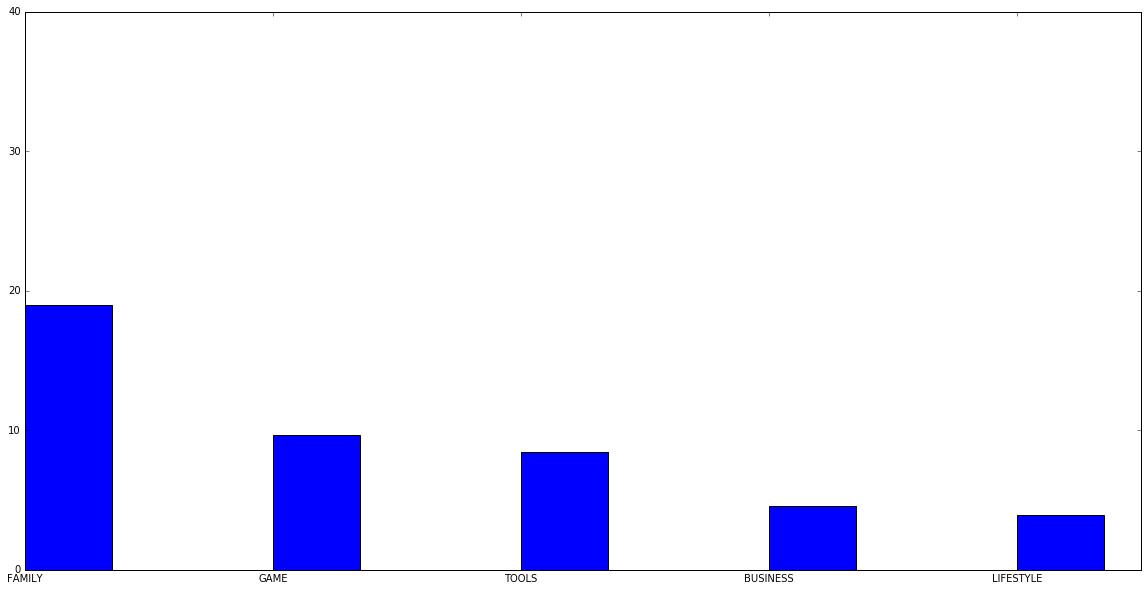

In [21]:
# Plot the bar chart to show the for the android app:
plt.figure(figsize=(20, 10))
ind = np.arange(len(android_apps_genre_freq_tuple)) 
percentage = []
labels = []
for k, v in android_apps_genre_freq_tuple:
    percentage.append(v)
    labels.append(k)
# We only show the first 5 categories
plt.bar(ind[:5], height=percentage[:5], width=0.35);
plt.yticks(np.arange(0, 50, 10))
plt.xticks(ind[:5], labels[:5]);

According to the result shown above, in iOS market, the apps designed for entertainment seem dominate the other apps categories, while in the Android market, the categories seem more balancing. Please note that this result focuses only in the Free and English apps, thus, this might not be correct if we consider all the apps in the market.

#### Most common genres which attract more users

Now we want to understand which app categories attract more users to install the app in the market. We can get this from the column "Installs" (index=5) in Google Play store data. However, there seems to be no such information in the App Store data, we can consider using the number of users who rated the app in "rating_count_tot" (index=6) in app store data.

Let's first analyze the iOS market:

In [34]:
# Average number of users rated different Genres in App Store data
user_ratings_per_genre = {}
genre_freq = {}
for row in free_english_ios_apps[1:]:
    genre = row[-5]
    number_of_ratings = int(row[6])
    if genre in user_ratings_per_genre:
        genre_freq[genre] += 1
        user_ratings_per_genre[genre] += number_of_ratings
    else:
        genre_freq[genre] = 1
        user_ratings_per_genre[genre] = number_of_ratings
user_ratings_per_genre = {k: v/ genre_freq[k] for k, v in user_ratings_per_genre.items()}
for genre, tot_ratings in sort_freq(list(zip(user_ratings_per_genre.keys(), user_ratings_per_genre.values()))):
    print("{}: {}".format(genre, tot_ratings))

Navigation: 86090.33333333333
Reference: 74942.11111111111
Social Networking: 71548.34905660378
Music: 57326.530303030304
Weather: 52279.892857142855
Book: 39758.5
Food & Drink: 33333.92307692308
Finance: 31467.944444444445
Photo & Video: 28441.54375
Travel: 28243.8
Shopping: 26919.690476190477
Health & Fitness: 23298.015384615384
Sports: 23008.898550724636
Games: 22812.92467948718
News: 21248.023255813954
Productivity: 21028.410714285714
Utilities: 18684.456790123455
Lifestyle: 16485.764705882353
Entertainment: 14029.830708661417
Business: 7491.117647058823
Education: 7003.983050847458
Catalogs: 4004.0
Medical: 612.0


As we can see, the navigation category attracts the most users to rate the app. But is this result correct? Let's dig deeper.

Let's first check some apps in the NAVIGATION category:

In [37]:
for row in free_english_ios_apps[1:]:
    if row[-5] == "Navigation":
        print("{} - {}".format(row[2], row[6]))

CoPilot GPS – Car Navigation & Offline Maps - 3582
Geocaching® - 12811
Google Maps - Navigation & Transit - 154911
ImmobilienScout24: Real Estate Search in Germany - 187
Railway Route Search - 5
Waze - GPS Navigation, Maps & Real-time Traffic - 345046


As we can see, there are only 6 apps in this category, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together.

We can also check for other categories also.

**Let's check the Google Play Store**

In [41]:
# Average number of users rated different Genres in App Store data
user_install_per_genre = {}
genre_freq = {}
for row in free_english_android_apps[1:]:
    genre = row[1]
    number_of_installs = row[5]
    number_of_installs = number_of_installs.replace(',', '')
    number_of_installs = number_of_installs.replace('+', '')
    number_of_installs = int(number_of_installs)
    if genre in user_install_per_genre:
        genre_freq[genre] += 1
        user_install_per_genre[genre] += number_of_installs
    else:
        genre_freq[genre] = 1
        user_install_per_genre[genre] = number_of_installs
user_install_per_genre = {k: v/ genre_freq[k] for k, v in user_install_per_genre.items()}
for genre, tot_installs in sort_freq(list(zip(user_install_per_genre.keys(), user_install_per_genre.values()))):
    print("{}: {}".format(genre, tot_installs))

COMMUNICATION: 38456119.167247385
VIDEO_PLAYERS: 24727872.452830188
SOCIAL: 23253652.127118643
PHOTOGRAPHY: 17805627.643678162
PRODUCTIVITY: 16787331.344927534
GAME: 15567446.911421912
TRAVEL_AND_LOCAL: 13984077.710144928
ENTERTAINMENT: 11719761.904761905
TOOLS: 10682301.033377837
NEWS_AND_MAGAZINES: 9549178.467741935
BOOKS_AND_REFERENCE: 8767811.894736841
SHOPPING: 7036877.311557789
PERSONALIZATION: 5201482.6122448975
WEATHER: 5074486.197183099
HEALTH_AND_FITNESS: 4188821.9853479853
MAPS_AND_NAVIGATION: 4056941.7741935486
FAMILY: 3697201.481261154
SPORTS: 3638640.1428571427
ART_AND_DESIGN: 1986335.0877192982
FOOD_AND_DRINK: 1924897.7363636363
EDUCATION: 1828640.7766990291
BUSINESS: 1712290.1474201474
LIFESTYLE: 1437816.2687861272
FINANCE: 1387692.475609756
HOUSE_AND_HOME: 1331540.5616438356
DATING: 854028.8303030303
COMICS: 817657.2727272727
AUTO_AND_VEHICLES: 647317.8170731707
LIBRARIES_AND_DEMO: 638503.734939759
PARENTING: 542603.6206896552
BEAUTY: 513151.88679245283
EVENTS: 253542.

We can also dig deeper into each categories to check if there is any app skews the result. 